# First Name:Richard
# Last Name:Setiawan

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 

# Read in data

In [2]:
nesarc = pd.read_csv('nesarc - large.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

In [3]:
nesarc['S2AQ5B'] = pd.to_numeric(nesarc['S2AQ5B'], errors='coerce') #convert variable to numeric
nesarc['S2AQ5D'] = pd.to_numeric(nesarc['S2AQ5D'], errors='coerce') #convert variable to numeric
nesarc['S2AQ5A'] = pd.to_numeric(nesarc['S2AQ5A'], errors='coerce') #convert variable to numeric
nesarc['S2BQ1B1'] = pd.to_numeric(nesarc['S2BQ1B1'], errors='coerce') #convert variable to numeric
nesarc['AGE'] = pd.to_numeric(nesarc['AGE'], errors='coerce') #convert variable to numeric

In [4]:
sub1=nesarc[(nesarc['AGE']>=26) & (nesarc['AGE']<=50) & (nesarc['S2AQ5A']==1)]
sub2=sub1.copy()

In [5]:
sub2['S2AQ5D']=sub2['S2AQ5D'].replace(99, np.nan)

sub2['S2AQ5B']=sub2['S2AQ5B'].replace(8, np.nan)
sub2['S2AQ5B']=sub2['S2AQ5B'].replace(9, np.nan)
sub2['S2AQ5B']=sub2['S2AQ5B'].replace(10, np.nan)
sub2['S2AQ5B']=sub2['S2AQ5B'].replace(99, np.nan)

sub2['S2BQ1B1']=sub2['S2BQ1B1'].replace(9, np.nan)

In [6]:
recode2 = {1:30, 2:26, 3:14, 4:8, 5:4, 6:2.5, 7:1}
sub2['BEER_FEQMO']= sub2['S2AQ5B'].map(recode2)

recode3 = {2:0, 1:1}
sub2['S2BQ1B1']= sub2['S2BQ1B1'].map(recode3)

In [7]:
#secondary variable 
sub2['NUMBEERMO_EST']=sub2['BEER_FEQMO'] * sub2['S2AQ5D'] 

# Scenario 1

# Perform Regression analysis between 
# Beer dependency (S2BQ1B1 -  Categorical Explanatory variable ) and 
# number of beers consumed in a month (NUMBEERMO_EST - Quantitative Response variable)
# use sub2

In [8]:
reg1 = smf.ols('NUMBEERMO_EST ~ S2BQ1B1', data=sub2).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:          NUMBEERMO_EST   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     197.7
Date:                Sat, 11 Jan 2020   Prob (F-statistic):           2.49e-44
Time:                        12:32:18   Log-Likelihood:                -38303.
No. Observations:                7226   AIC:                         7.661e+04
Df Residuals:                    7224   BIC:                         7.662e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5414      0.592     43.143      0.0

# Get the mean and Standard deviation of number of beers consumed (NUMBEERMO_EST), grouped by beer dependency (S2BQ1B1). use sub3

In [9]:
sub3 = sub2[['NUMBEERMO_EST', 'S2BQ1B1']].dropna()

# group means & sd
print ("Mean")
ds1 = sub3.groupby('S2BQ1B1').mean()
print (ds1)

print ("Standard deviation")
ds2 = sub3.groupby('S2BQ1B1').std()
print (ds2)

Mean
          NUMBEERMO_EST
S2BQ1B1                
0.000000      25.541394
1.000000      56.877451
Standard deviation
          NUMBEERMO_EST
S2BQ1B1                
0.000000      44.356007
1.000000      86.321327


# Plot bar chart to show relations between number of beers consumed (NUMBEERMO_EST) and beer dependency (S2BQ1B1). use sub3

<IPython.core.display.Javascript object>


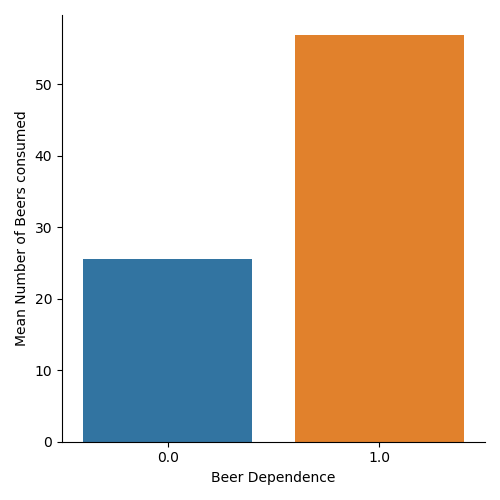

Text(13.819444444444445, 0.5, 'Mean Number of Beers consumed')

In [11]:
%matplotlib notebook
sns.catplot(x="S2BQ1B1", y="NUMBEERMO_EST", data=sub3, kind="bar", ci=None)
plt.xlabel('Beer Dependence')
plt.ylabel('Mean Number of Beers consumed')

# Logistical Regression - Scenario 2

# Perform Logistical Regression analysis between beer dependency (y=S2BQ1B1)  and general anxiety (x=GENAXLIFE). Use sub2

In [12]:
lreg1 = smf.logit(formula = 'S2BQ1B1 ~ GENAXLIFE', data = sub2).fit()
print (lreg1.summary())

Optimization terminated successfully.
         Current function value: 0.212712
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                S2BQ1B1   No. Observations:                10406
Model:                          Logit   Df Residuals:                    10404
Method:                           MLE   Df Model:                            1
Date:                Sat, 11 Jan 2020   Pseudo R-squ.:                0.007208
Time:                        12:34:50   Log-Likelihood:                -2213.5
converged:                       True   LL-Null:                       -2229.6
Covariance Type:            nonrobust   LLR p-value:                 1.434e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8998      0.045    -64.130      0.000      -2.988      -2.811
GENAXLIFE      0.8948      0.

In [13]:
params = lreg1.params
conf = lreg1.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))

           Lower CI  Upper CI       OR
Intercept  0.050367  0.060134 0.055034
GENAXLIFE  1.846265  3.242687 2.446806


# Logistical Regression - Scenario 3

In [14]:
sub2['DYSLIFE'] = pd.to_numeric(sub2['DYSLIFE'], errors='coerce')

# Perform Logistical Regression analysis between beer dependency (y=S2BQ1B1)  and general anxiety (x1=GENAXLIFE) and minor depression (x2=DYSLIFE). Use sub2

In [15]:
lreg2 = smf.logit(formula = 'S2BQ1B1 ~ GENAXLIFE + DYSLIFE', data = sub2).fit()
print (lreg2.summary())

Optimization terminated successfully.
         Current function value: 0.212607
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                S2BQ1B1   No. Observations:                10406
Model:                          Logit   Df Residuals:                    10403
Method:                           MLE   Df Model:                            2
Date:                Sat, 11 Jan 2020   Pseudo R-squ.:                0.007697
Time:                        12:35:58   Log-Likelihood:                -2212.4
converged:                       True   LL-Null:                       -2229.6
Covariance Type:            nonrobust   LLR p-value:                 3.524e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9099      0.046    -63.488      0.000      -3.000      -2.820
GENAXLIFE      0.8070      0.

In [16]:
# odd ratios with 95% confidence intervals
params = lreg2.params
conf = lreg2.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))

           Lower CI  Upper CI       OR
Intercept  0.049798  0.059600 0.054479
GENAXLIFE  1.649620  3.044656 2.241099
DYSLIFE    0.924975  1.832270 1.301846


# Logistical Regression - Scenario 4

In [17]:
def PANIC (x1):
    if ((x1['S6Q1']==1 and x1['S6Q2']==1) or (x1['S6Q2']==1 and x1['S6Q3']==1) or 
    (x1['S6Q3']==1 and x1['S6Q61']==1) or (x1['S6Q61']==1 and x1['S6Q62']==1) or 
    (x1['S6Q62']==1 and x1['S6Q63']==1) or (x1['S6Q63']==1 and x1['S6Q64']==1) or 
    (x1['S6Q64']==1 and x1['S6Q65']==1) or (x1['S6Q65']==1 and x1['S6Q66']==1) or 
    (x1['S6Q66']==1 and x1['S6Q67']==1) or (x1['S6Q67']==1 and x1['S6Q68']==1) or 
    (x1['S6Q68']==1 and x1['S6Q69']==1) or (x1['S6Q69']==1 and x1['S6Q610']==1) or 
    (x1['S6Q610']==1 and x1['S6Q611']==1) or (x1['S6Q611']==1 and x1['S6Q612']==1) or 
    (x1['S6Q612']==1 and x1['S6Q613']==1) or (x1['S6Q613']==1 and x1['S6Q7']==1) or 
    x1['S6Q7']==1):
        return 1
    else:
        return 0
sub2['PANIC'] = sub1.apply (lambda x1: PANIC (x1), axis=1)
c7 = sub2["PANIC"].value_counts(sort=False, dropna=False)
print(c7)

0    9596
1     921
Name: PANIC, dtype: int64


# Perform Logistical Regression analysis between beer dependency (y=S2BQ1B1)  and panic disorder (x=PANIC). Use sub2

In [18]:
# logistic regression with panic
lreg3 = smf.logit(formula = 'S2BQ1B1 ~ PANIC', data = sub2).fit()
print (lreg3.summary())

Optimization terminated successfully.
         Current function value: 0.213531
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                S2BQ1B1   No. Observations:                10406
Model:                          Logit   Df Residuals:                    10404
Method:                           MLE   Df Model:                            1
Date:                Sat, 11 Jan 2020   Pseudo R-squ.:                0.003385
Time:                        12:37:02   Log-Likelihood:                -2222.0
converged:                       True   LL-Null:                       -2229.6
Covariance Type:            nonrobust   LLR p-value:                 0.0001023
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8917      0.046    -62.875      0.000      -2.982      -2.802
PANIC          0.5210      0.

In [19]:
# odd ratios with 95% confidence intervals
print ("Odds Ratios")
params = lreg3.params
conf = lreg3.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))

Odds Ratios
           Lower CI  Upper CI       OR
Intercept  0.050699  0.060715 0.055481
PANIC      1.312633  2.159621 1.683684


# Logistical Regression - Scenario 5

# Perform Logistical Regression analysis between beer dependency (y=S2BQ1B1)  and panic disorder (x1=PANIC) and minor depression (x2=DYSLIFE). Use sub2

In [20]:
# logistic regression with panic and depression
lreg4 = smf.logit(formula = 'S2BQ1B1 ~ PANIC + DYSLIFE', data = sub2).fit()
print (lreg4.summary())

Optimization terminated successfully.
         Current function value: 0.213222
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                S2BQ1B1   No. Observations:                10406
Model:                          Logit   Df Residuals:                    10403
Method:                           MLE   Df Model:                            2
Date:                Sat, 11 Jan 2020   Pseudo R-squ.:                0.004828
Time:                        12:37:34   Log-Likelihood:                -2218.8
converged:                       True   LL-Null:                       -2229.6
Covariance Type:            nonrobust   LLR p-value:                 2.113e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9109      0.047    -62.201      0.000      -3.003      -2.819
PANIC          0.4432      0.

In [21]:
# odd ratios with 95% confidence intervals
print ("Odds Ratios")
params = lreg4.params
conf = lreg4.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))

Odds Ratios
           Lower CI  Upper CI       OR
Intercept  0.049659  0.059658 0.054429
PANIC      1.203973  2.015228 1.557652
DYSLIFE    1.121488  2.141030 1.549561
